In [63]:
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (12,8)

In [74]:
x, y = make_blobs(n_samples=150, n_features=2,
                  centers=3, cluster_std=0.5, random_state=0)

In [75]:
def plot_cluster(data_x, y_pred, plot_centroids=True, title=False):
    x_centroids = []
    y_centroids = []

    for cluster in set(y_pred):
        x = data_x[y_pred == cluster, 0]
        y = data_x[y_pred == cluster, 1]
        x_centroids.append(np.mean(x))
        y_centroids.append(np.mean(y))
        plt.scatter(x, y, marker='o', label=f'Cluster {cluster}')

    if plot_centroids:
        plt.scatter(x_centroids, y_centroids, marker='*', s=250, label='Centroid')
    if title:
        plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

In [76]:
db = DBSCAN(metric='euclidean', eps=0.5, min_samples=5)

In [77]:
y_db = db.fit_predict(x)

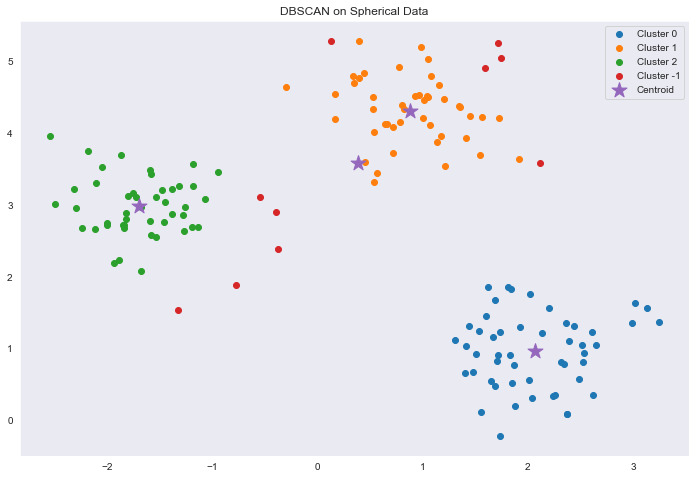

In [78]:
plot_cluster(x, y_db, title='DBSCAN on Spherical Data')

In [79]:
# generate moon-shape data
x_moon, y = make_moons(n_samples=200,
                  noise=0.05,
                  random_state=0)

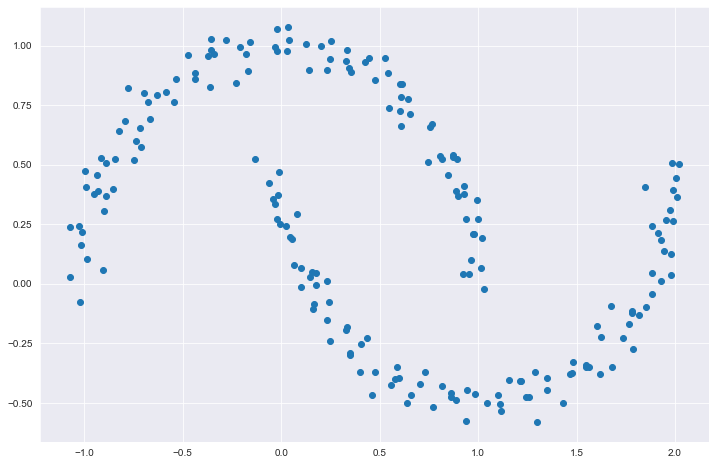

In [80]:
# plot data
plt.scatter(x_moon[:,0], x_moon[:,1])
plt.show()

# Comparing KMeans to Agglomerative Clustering to DBSCAN on Half Moon Shaped Clusters

### K-Means Clustering

In [103]:
km = KMeans(n_clusters=2, n_init=10, random_state=0)
y_km = km.fit_predict(x_moon)

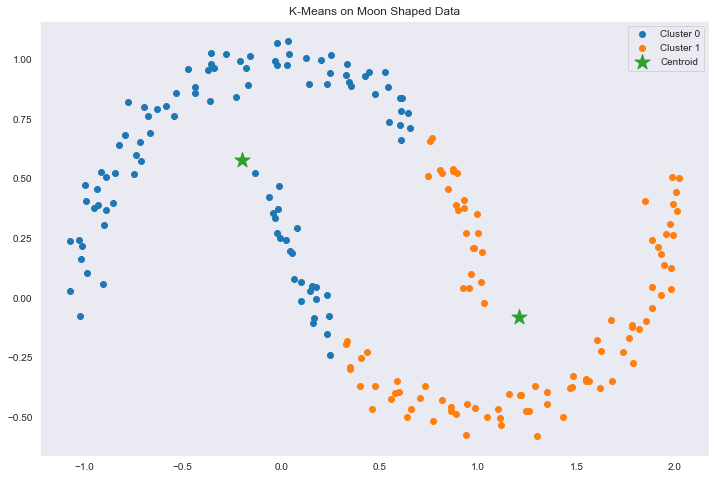

In [104]:
plot_cluster(x_moon, y_km, title='K-Means on Moon Shaped Data');

### Agglomerative Clustering


In [105]:
agg_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [106]:
y_agg = agg_cluster.fit_predict(x_moon)

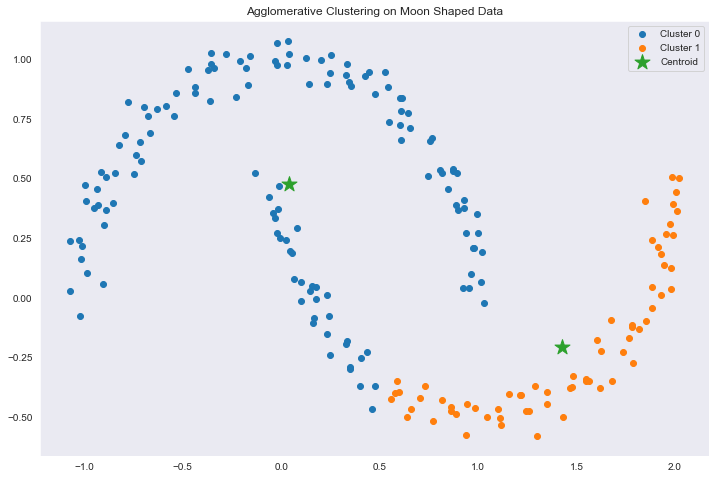

In [107]:
plot_cluster(x_moon, y_agg, title='Agglomerative Clustering on Moon Shaped Data')

### DBSCAN

In [108]:
db = DBSCAN(eps=0.2,
            min_samples=5,
            metric='euclidean')

In [109]:
y_db = db.fit_predict(x_moon)

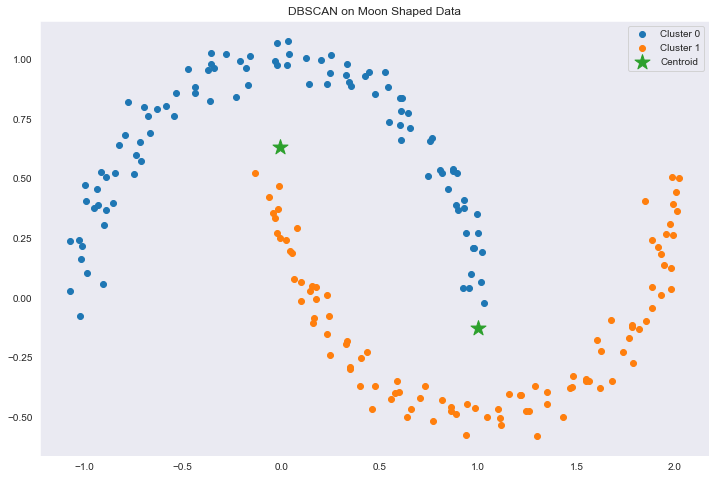

In [110]:
plot_cluster(x_moon, y_db, title='DBSCAN on Moon Shaped Data')